## Movie Revenue Predictions

### Importing Dataset and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
plt.style.use('ggplot')

In [2]:
pd.set_option('display.max_columns', None)

#### Reading the Data

In [3]:
train=pd.read_csv(r'train.csv')
#test=pd.read_csv(r'test.csv')

train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


After taking an initial glance at the data we can see certain columns look like JSON or Dictionary format so I shall go ahead
and take a look at the datatypes that we have for the columns

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [5]:
type(train['production_countries'][3])

str

#### The columns were originally in json format but due to the formatting of the csv file were imported as strings into the dataframe, we need to turn the strings back into lists and dictionaries.

### Data Cleaning

In [6]:
# Safely evaluate an expression node or a string containing a Python literal or container display.
from ast import literal_eval

Storing the variables which contain the Dictionary format Data.

In [7]:
dict_types = ['belongs_to_collection','genres','production_countries','spoken_languages','production_companies','Keywords','cast','crew']

Function to convert Column to Dictionary datatype

In [8]:
def to_dict(data, cols):
    '''
    Function to convert string format into dict and list format
    Args: data = dataframe
          cols = list; header names
    Returns: data = dataframe
    '''
    for col in cols:
        data[col] = data[col].apply(lambda x: {} if pd.isna(x) else literal_eval(x))
        
    return data

train = to_dict(train, dict_types)
#test = to_dict(test, dict_types)

In [9]:
train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

#### Function to convert the Dictionary formatted variables to lists of the value contained in the 'name' key since that is of interest in our analysis

In [10]:
def dic_to_vals(data, cols):
    '''
    Function to turn values of dictionary variables into lists of the value of 'name'
    Args: dataset = dataframe
          headers = list; column headers whose contents need to be transformed
    Returns: dataset = dataframe
    '''
    #Creating temporary columns to store the formatted lists
    temp_names = list(map(lambda x: x+'_temp', cols))
    for head in temp_names:
        data[head] = 0
    
    #Convert dicts to lists containing only the value in 'name' key
    j=0
    for org_col in cols:
        data[temp_names[j]] = data[org_col].apply(lambda x: ','.join(i['name'] for i in x) if x != {} else '')
        j+=1
    
    return data

train = dic_to_vals(train, dict_types)
#test = dic_to_vals(test, dict_types)

train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,belongs_to_collection_temp,genres_temp,production_countries_temp,spoken_languages_temp,production_companies_temp,Keywords_temp,cast_temp,crew_temp
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,Comedy,United States of America,English,"Paramount Pictures,United Artists,Metro-Goldwy...","time travel,sequel,hot tub,duringcreditsstinger","Rob Corddry,Craig Robinson,Clark Duke,Adam Sco...","Kelly Cantley,Steve Pink,Josh Heald,Josh Heald..."
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,"Comedy,Drama,Family,Romance",United States of America,English,Walt Disney Pictures,"coronation,duty,marriage,falling in love","Anne Hathaway,Julie Andrews,H√©ctor Elizondo,J...","Garry Marshall,Charles Minsky,John Debney,Whit..."


#### Checking shape of New Datframes with added columns

In [11]:
train.shape

(3000, 31)

In [12]:
train['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

#### Checking for null values

In [13]:
train.isna().sum()

id                               0
belongs_to_collection            0
budget                           0
genres                           0
homepage                      2054
imdb_id                          0
original_language                0
original_title                   0
overview                         8
popularity                       0
poster_path                      1
production_companies             0
production_countries             0
release_date                     0
runtime                          2
spoken_languages                 0
status                           0
tagline                        597
title                            0
Keywords                         0
cast                             0
crew                             0
revenue                          0
belongs_to_collection_temp       0
genres_temp                      0
production_countries_temp        0
spoken_languages_temp            0
production_companies_temp        0
Keywords_temp       

## Exploratory Data Analysis

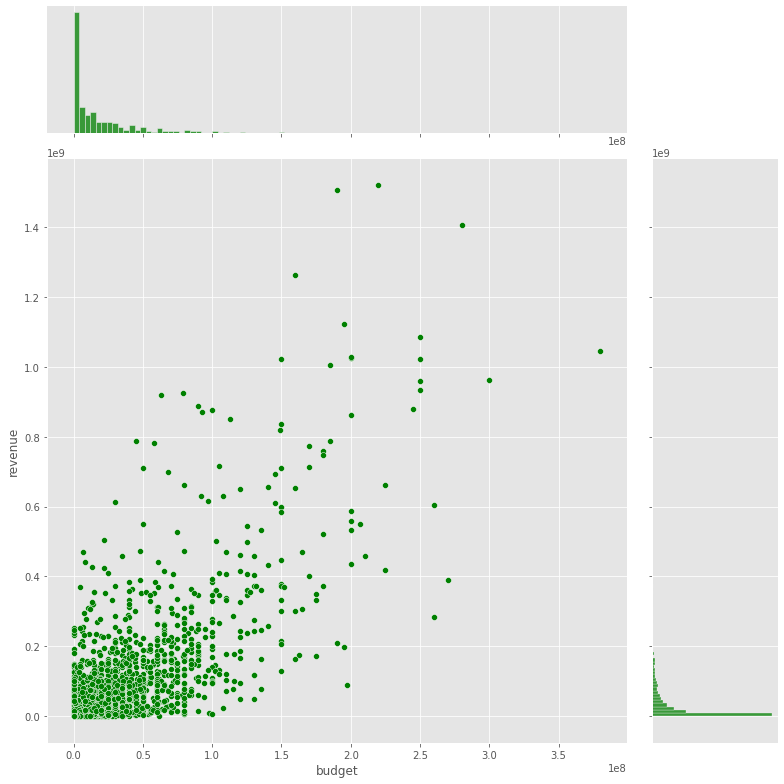

In [15]:
sns.jointplot(x="budget", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

We can see that Budget and Revenue have somewhat positive correlation however not very strong.

In [ ]:
train.columns

In [ ]:
sns.jointplot(x="popularity", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

Popularity quite interestingly also doesn't show a strong correlation with revenue which is quite contradictory 

In [ ]:
train['genres_temp'].value_counts().head(5)

Taking a look at the top most popular genres in which movies have been produced

In [ ]:
plt.figure(figsize=(10,9))
sns.barplot(x='genres_temp', y='revenue', data=train[train['genres_temp'].isin(['Drama','Comedy','Drama,Romance','Comedy,Romance','Comedy,Drama'])])
plt.show()

The barplot above depicts the revenue generated by the most popular Genres and Comedy and Romance seem to dominate this

In [ ]:
sns.jointplot(x="runtime", y="revenue", data=train, height=11, ratio=4, color="g")
plt.show()

A jointplot of Runtime and Revenue shows not positive correlation and also shows that most movies have a mean runtime of about 100 to 150 minutes

/home/arko/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

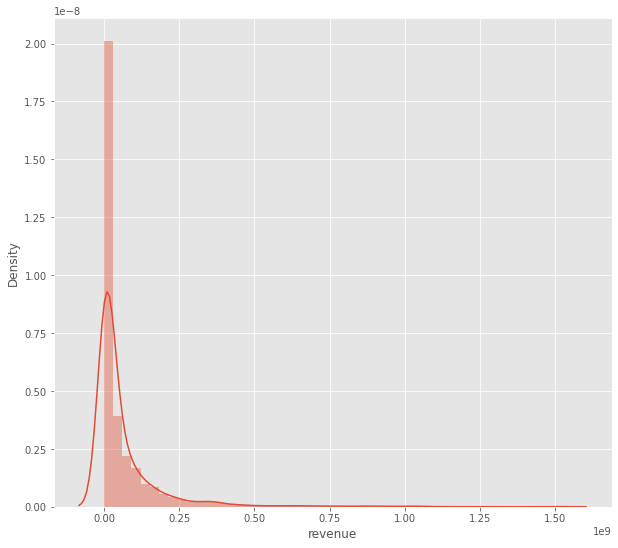

In [16]:
plt.figure(figsize=(10,9))
sns.distplot(train.revenue)

The distribution of the revenue column seems to be quite right skewed

In [14]:
train[['release_month','release_date','release_year']]=train['release_date'].str.split('/', expand=True).replace(np.nan, -1).astype('int')

train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,belongs_to_collection_temp,genres_temp,production_countries_temp,spoken_languages_temp,production_companies_temp,Keywords_temp,cast_temp,crew_temp,release_month,release_year
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,Comedy,United States of America,English,"Paramount Pictures,United Artists,Metro-Goldwy...","time travel,sequel,hot tub,duringcreditsstinger","Rob Corddry,Craig Robinson,Clark Duke,Adam Sco...","Kelly Cantley,Steve Pink,Josh Heald,Josh Heald...",2,15
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,"Comedy,Drama,Family,Romance",United States of America,English,Walt Disney Pictures,"coronation,duty,marriage,falling in love","Anne Hathaway,Julie Andrews,H√©ctor Elizondo,J...","Garry Marshall,Charles Minsky,John Debney,Whit...",8,4
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,,Drama,United States of America,English,"Bold Films,Blumhouse Productions,Right of Way ...","jazz,obsession,conservatory,music teacher,new ...","Miles Teller,J.K. Simmons,Melissa Benoist,Aust...","Terri Taylor,Richard Henderson,Jeffrey Stott,H...",10,14
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",9,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,,"Thriller,Drama",India,"English,हिन्दी",,"mystery,bollywood,police corruption,crime,indi...","Vidya Balan,Nawazuddin Siddiqui,Parambrata Cha...","Sujoy Ghosh,Sujoy Ghosh,Sujoy Ghosh",3,12
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},"[{'is

Splitting Release Data column such that Date, Month and Year and store them in seperate columns

In [15]:
train['release_year'] = train['release_year'].apply(lambda x: x+1900 if x>19 else x+2000).astype(int)

train['release_year'].head()

0    2015
1    2004
2    2014
3    2012
4    2009
Name: release_year, dtype: int64

As the Release Year column is a little ambiguous since we dont know if its for 20th Century or 21st Century I have converted the column to show full year instead of last 2 digits

/home/arko/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


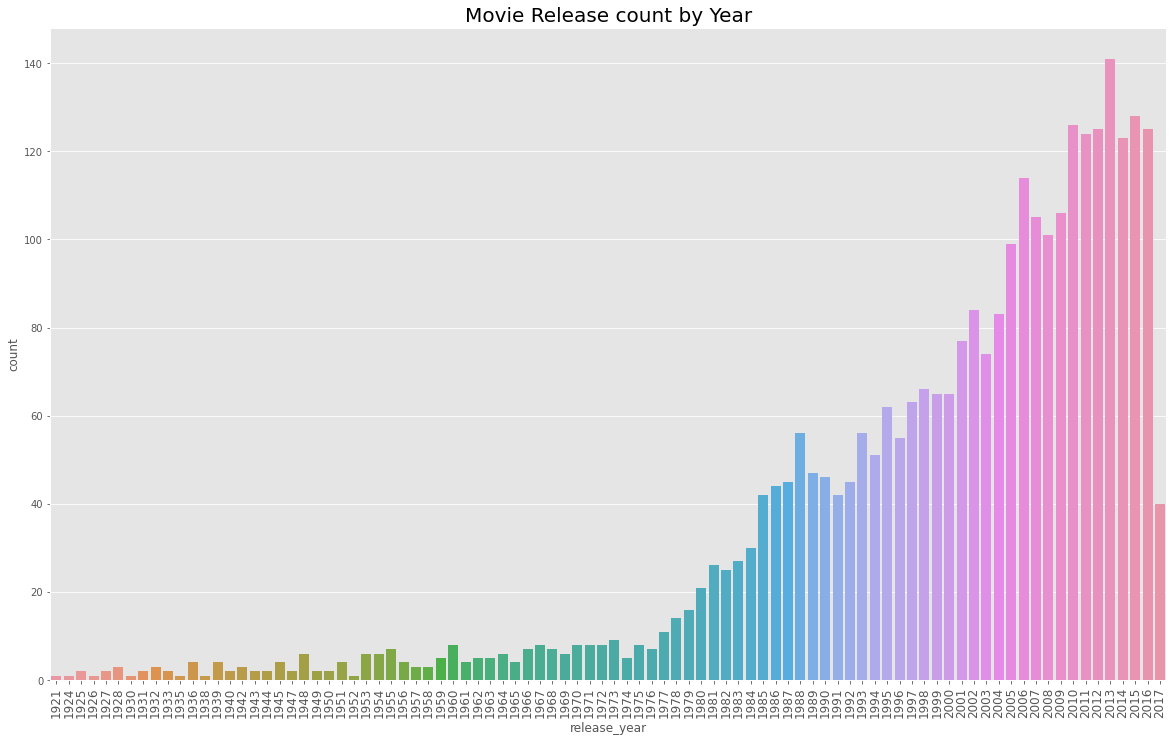

In [22]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_year'])
plt.title("Movie Release count by Year",fontsize=20)
#loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

Taking a look at the frequency of movies produced every year and 2013 seems to have the highest count. Its also interesting to note that there is strong upward curve of movie productions since 1976

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_month'])
plt.title("Movie Release count by Month",fontsize=20)
#loc, labels = plt.xticks()
plt.xticks(fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_date'])
plt.title("Movie Release count by Day",fontsize=20)
#loc, labels = plt.xticks()
plt.xticks(fontsize=12)
plt.show()

In [ ]:
train.columns

In [16]:
train['release_fulldate'] = train[['release_date','release_month','release_year']].apply(lambda x: '/'.join(x.values.astype(str)), axis=1)

train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,belongs_to_collection_temp,genres_temp,production_countries_temp,spoken_languages_temp,production_companies_temp,Keywords_temp,cast_temp,crew_temp,release_month,release_year,release_fulldate
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,Comedy,United States of America,English,"Paramount Pictures,United Artists,Metro-Goldwy...","time travel,sequel,hot tub,duringcreditsstinger","Rob Corddry,Craig Robinson,Clark Duke,Adam Sco...","Kelly Cantley,Steve Pink,Josh Heald,Josh Heald...",2,2015,20/2/2015
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,"Comedy,Drama,Family,Romance",United States of America,English,Walt Disney Pictures,"coronation,duty,marriage,falling in love","Anne Hathaway,Julie Andrews,H√©ctor Elizondo,J...","Garry Marshall,Charles Minsky,John Debney,Whit...",8,2004,6/8/2004
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,,Drama,United States of America,English,"Bold Films,Blumhouse Productions,Right of Way ...","jazz,obsession,conservatory,music teacher,new ...","Miles Teller,J.K. Simmons,Melissa Benoist,Aust...","Terri Taylor,Richard Henderson,Jeffrey Stott,H...",10,2014,10/10/2014
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",9,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,,"Thriller,Drama",India,"English,हिन्दी",,"mystery,bollywood,police corruption,crime,indi...","Vidya Balan,Nawazuddin Siddiqui,Parambrata Cha...","Sujoy Ghosh,Sujoy Ghosh,Sujoy Ghosh",3,2012,9/3/2012
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former 

Recreating the release full-date column which I had replaced earlier to do certain time based analysis down the line

In [17]:
train['release_fulldate'] = pd.to_datetime(train['release_fulldate'])

In [18]:
import datetime as dt

In [164]:
train['day_of_week'] = train['release_fulldate'].dt.dayofweek
train['release_quarter'] = train['release_fulldate'].dt.quarter

Extracting Day of week and Quarter of year to further analyse and gain insight about how movies ae released and what time is optimal

/home/arko/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


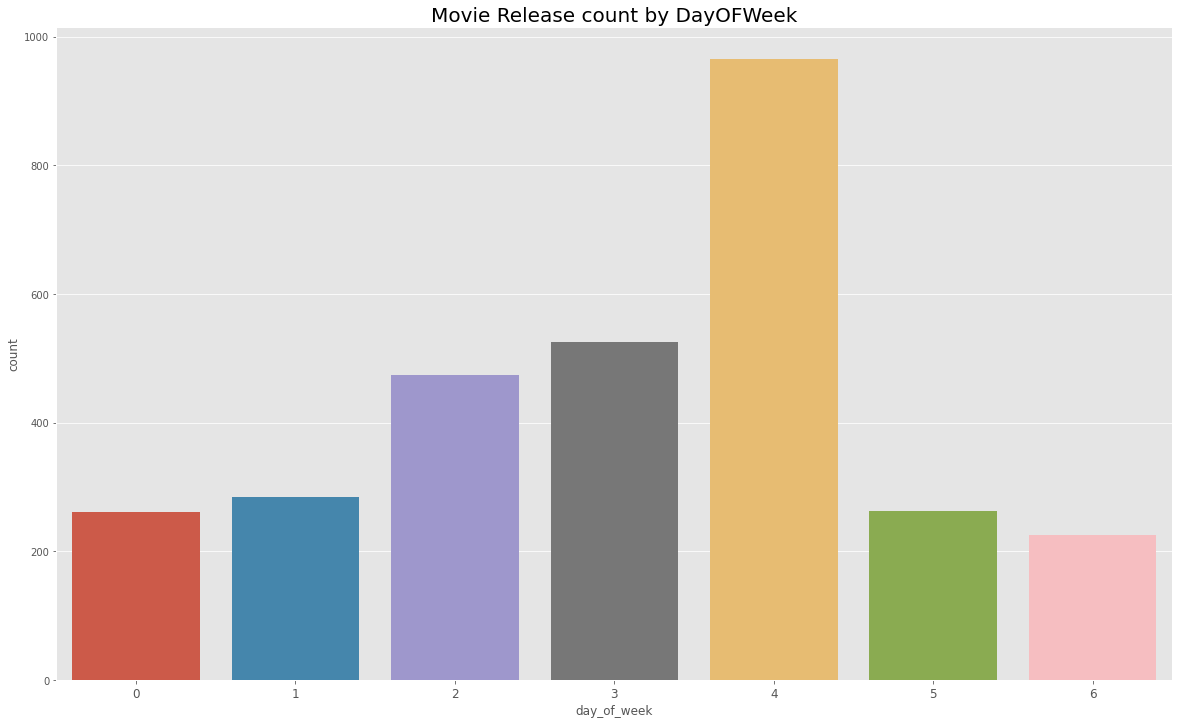

In [165]:
plt.figure(figsize=(20,12))
sns.countplot(train['day_of_week'])
plt.title("Movie Release count by DayOFWeek",fontsize=20)
#loc, labels = plt.xticks()
plt.xticks(fontsize=12)
plt.show()

/home/arko/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


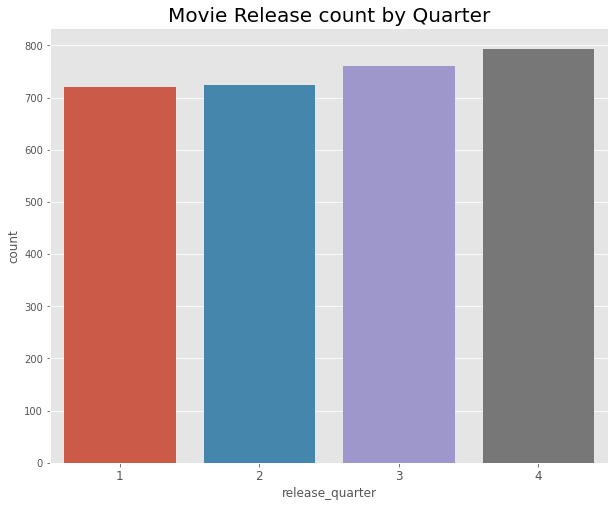

In [166]:
plt.figure(figsize=(10,8))
sns.countplot(train['release_quarter'])
plt.title("Movie Release count by Quarter",fontsize=20)
#loc, labels = plt.xticks()
plt.xticks(fontsize=12)
plt.show()

In [ ]:
train.columns

In [ ]:
d1 = train.groupby('release_year')['revenue'].agg('mean').reset_index()
d1

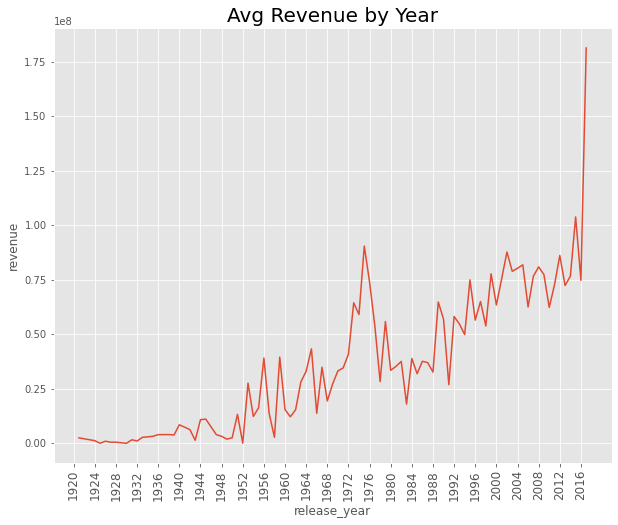

In [167]:
plt.figure(figsize=(10,8))
sns.lineplot(x='release_year', y='revenue', data=d1)
plt.title("Avg Revenue by Year",fontsize=20)
labels = np.arange(1920,2019,4)
plt.xticks(labels,fontsize=12,rotation=90)
plt.show()

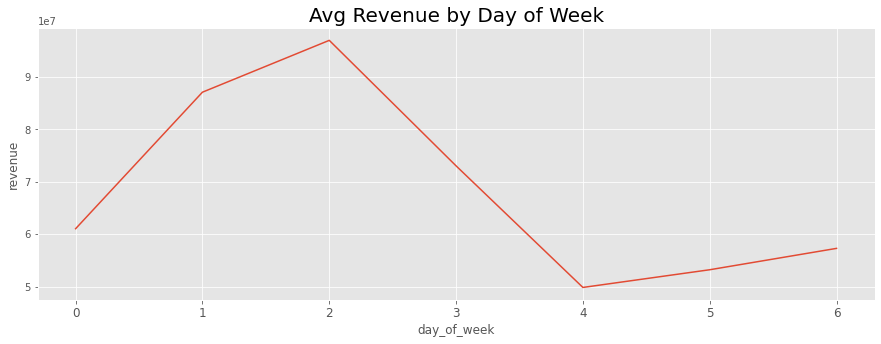

In [168]:
d1 = train.groupby('day_of_week')['revenue'].agg('mean').reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='day_of_week', y='revenue', data=d1)
plt.title("Avg Revenue by Day of Week",fontsize=20)
plt.xticks(fontsize=12)
plt.show()

In [ ]:
d1 = train.groupby('release_quarter')['revenue'].agg('mean').reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='release_quarter', y='revenue', data=d1)
plt.title("Avg Revenue by Day of Quarter",fontsize=20)
plt.xticks(fontsize=12)
plt.show()

In [ ]:
d1 = train.groupby('release_year')['runtime'].agg('mean').reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='release_year', y='runtime', data=d1)
plt.title("Avg runtime by Year",fontsize=20)
plt.xticks(fontsize=12)
plt.show()

In [ ]:
d1 = train.groupby('release_year')['popularity'].agg('mean').reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='release_year', y='popularity', data=d1)
plt.title("Avg poularity by Year",fontsize=20)
plt.xticks(fontsize=12)
plt.show()

In [20]:
d1 = train.groupby('release_year')['budget','revenue'].agg('mean').reset_index()


<ipython-input-20-83d9198585e3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d1 = train.groupby('release_year')['budget','revenue'].agg('mean').reset_index()


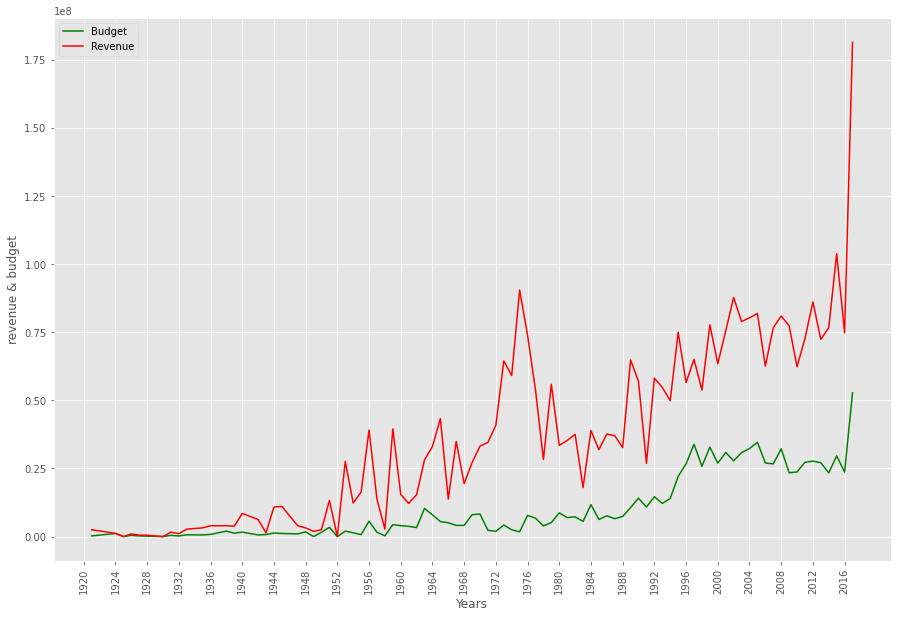

In [21]:
plt.figure(figsize=(15,10))
plt.plot(d1['release_year'], d1['budget'], color="g", label='Budget')
plt.plot(d1['release_year'], d1['revenue'], color="r", label='Revenue')
plt.xticks(np.arange(1920,2018,4), rotation=90)
plt.xlabel("Years")
plt.ylabel("revenue & budget")
plt.legend()
plt.show()

### Feature Engineering

#### Getting dummies for variables such as genres, production companies and cast and reataining only top 20 values with highest counts

In [ ]:
genres = train.genres_temp.str.get_dummies(sep=',')
genres

In [23]:
train = pd.concat([train, genres.iloc[:,:-1]], axis=1, sort=False) #dropped one column to avoid multicollinearity

train.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,belongs_to_collection_temp,genres_temp,production_countries_temp,spoken_languages_temp,production_companies_temp,Keywords_temp,cast_temp,crew_temp,release_month,release_year,release_fulldate,day_of_week,release_quarter,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,Comedy,United States of America,English,"Paramount Pictures,United Artists,Metro-Goldwy...","time travel,sequel,hot tub,duringcreditsstinger","Rob Corddry,Craig Robinson,Clark Duke,Adam Sco...","Kelly Cantley,Steve Pink,Josh Heald,Josh Heald...",2,2015,2015-02-20,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'belongs_to_collection_temp', 'genres_temp',
       'production_countries_temp', 'spoken_languages_temp',
       'production_companies_temp', 'Keywords_temp', 'cast_temp', 'crew_temp',
       'release_month', 'release_year', 'release_fulldate', 'day_of_week',
       'release_quarter', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War'],
      dtype='object')

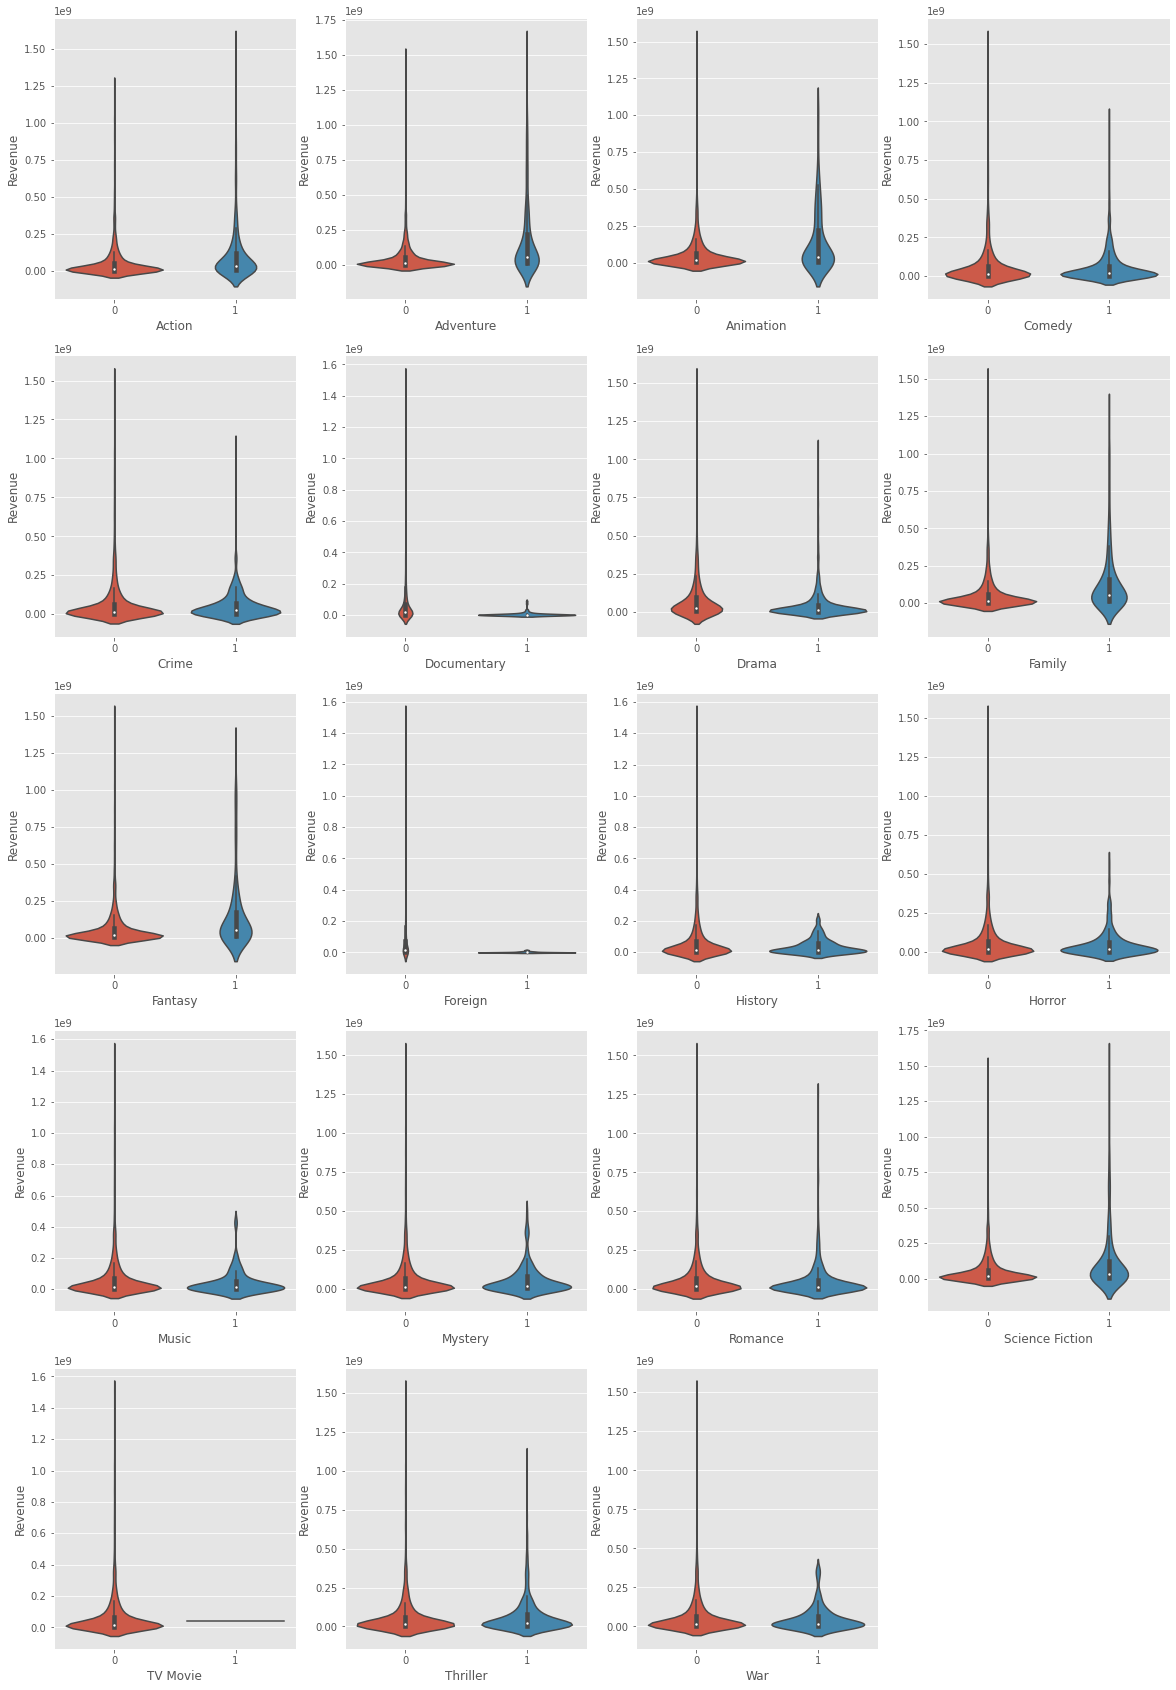

In [25]:
genres=['Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War']

counter=0

fig, ax= plt.subplots(5, 4, figsize=[20,30])
for j in range(len(ax)):
    for i in range(4):
        if counter>18:
            break
        else:
            ax[j][i] = sns.violinplot(x=genres[counter], y='revenue', data=train, ax=ax[j][i])
            ax[j][i].set_xlabel(genres[counter])
            ax[j][i].set_ylabel('Revenue')
            counter+=1
            
fig.delaxes(ax=ax[4,3])

<AxesSubplot:xlabel='belongs', ylabel='revenue'>

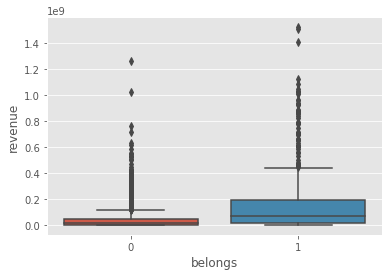

In [26]:
train['belongs'] = train['belongs_to_collection'].apply(lambda x: 1 if x != {} else 0)

sns.boxplot(x = 'belongs', y='revenue', data=train)

In [ ]:
train.columns

In [27]:
prod_comp = train.production_companies_temp.str.get_dummies(sep=',')

In [28]:
cast_comp = train.cast_temp.str.get_dummies(sep=',')

In [29]:
#keeping top 15 production companies who have created highest number of movies
x = prod_comp.sum(axis=0).sort_values(ascending=False).head(15).reset_index()

In [30]:
x

,index,0
0,Warner Bros.,202
1,Universal Pictures,188
2,Paramount Pictures,161
3,Twentieth Century Fox Film Corporation,138
4,Columbia Pictures,91
5,Metro-Goldwyn-Mayer (MGM),84
6,New Line Cinema,75
7,Touchstone Pictures,63
8,Walt Disney Pictures,62
9,Columbia Pictures Corporation,61


In [31]:
# keeping top 30 actors who have worked on highest number of movies
y = cast_comp.sum(axis=0).sort_values(ascending=False).head(30).reset_index()

In [32]:
#converting to list
l1 = list(x.loc[:,'index'])


In [33]:
l2 = list(y.loc[:,'index'])

#### Retaining top 15 production companies

In [34]:
prod_comp = prod_comp.drop(prod_comp.columns.difference(l1), axis=1)

#### Retaining top 30 cast with highest count of movies

In [35]:
cast_comp = cast_comp.drop(cast_comp.columns.difference(l2), axis=1)

In [36]:
#concatinating with original dataframe
train = pd.concat([train, cast_comp], axis=1, sort=False)

In [37]:
train = pd.concat([train, prod_comp], axis=1, sort=False)

In [38]:
train.shape

(3000, 101)

#### We currently have 101 columns to work with

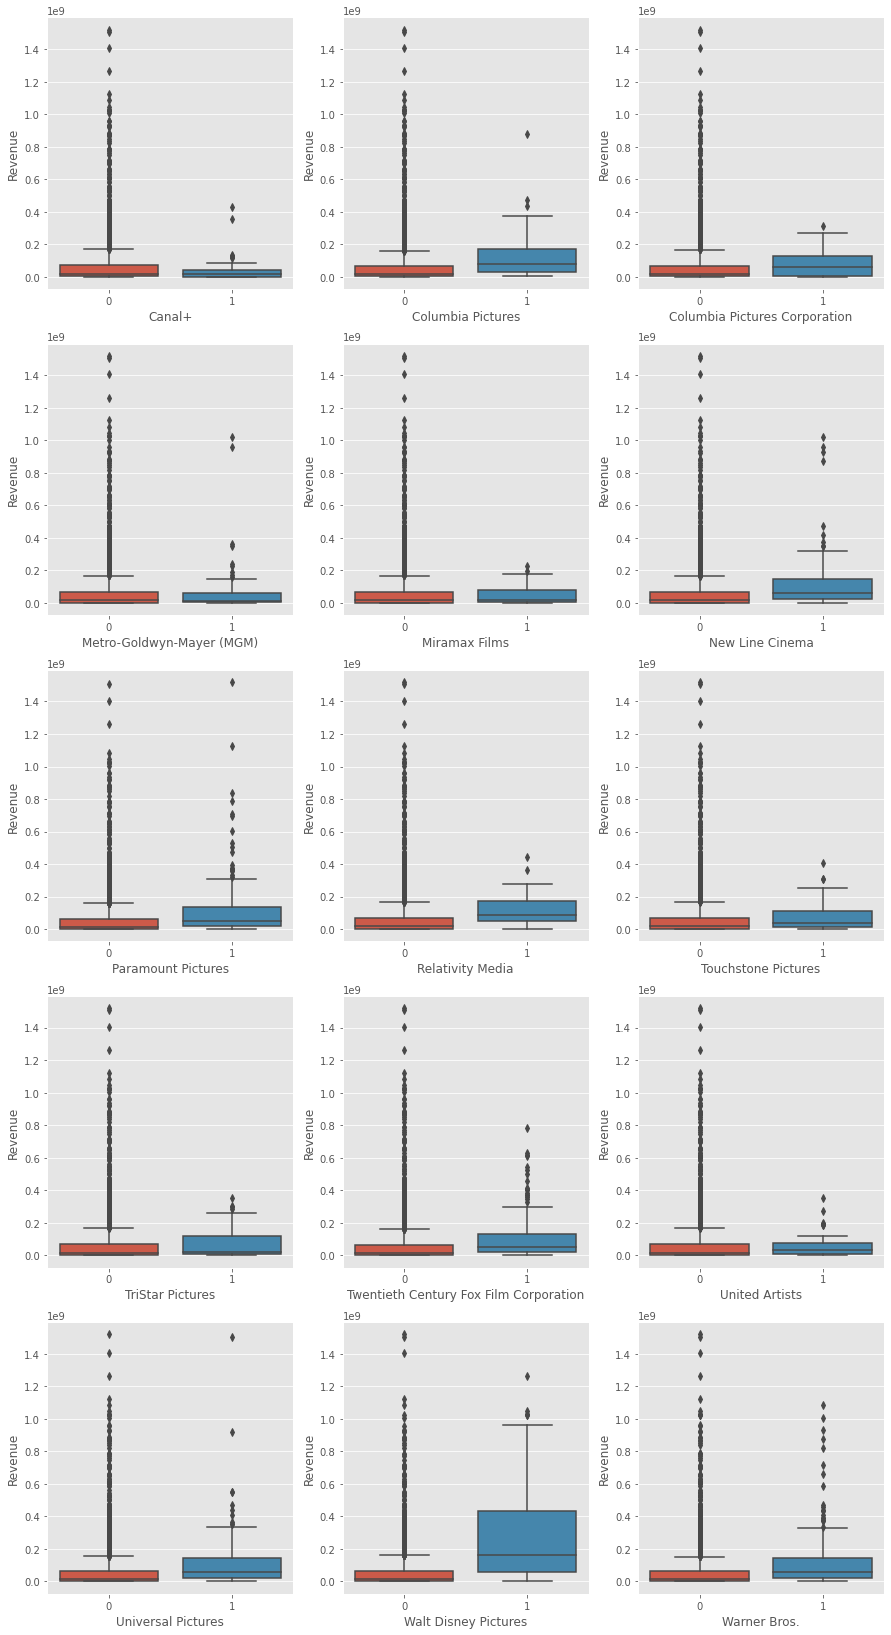

In [39]:
prod_house=['Canal+', 'Columbia Pictures', 'Columbia Pictures Corporation',
       'Metro-Goldwyn-Mayer (MGM)', 'Miramax Films', 'New Line Cinema',
       'Paramount Pictures', 'Relativity Media', 'Touchstone Pictures',
       'TriStar Pictures', 'Twentieth Century Fox Film Corporation',
       'United Artists', 'Universal Pictures', 'Walt Disney Pictures',
       'Warner Bros.']

counter=0

fig, ax= plt.subplots(5, 3, figsize=[15,29])

for j in range(len(ax)):
    for i in range(3):
        if j==4 & i==2:
            break
        else:
            ax[j][i] = sns.boxplot(x=prod_house[counter], y='revenue', data=train, ax=ax[j][i])
            ax[j][i].set_xlabel(prod_house[counter])
            ax[j][i].set_ylabel('Revenue')
            counter+=1
            
#fig.delaxes(ax=ax[2,2])

#### Analysing change in revenue generation and how it depends on the top Production houses

Dropping unnecessary columns

In [40]:
train = train.drop(['belongs_to_collection','Keywords','cast','crew','release_month','day_of_week','release_quarter','production_companies_temp','genres_temp','poster_path','homepage'], axis=1)

In [41]:
train.columns

Index(['id', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'revenue', 'belongs_to_collection_temp',
       'production_countries_temp', 'spoken_languages_temp', 'Keywords_temp',
       'cast_temp', 'crew_temp', 'release_year', 'release_fulldate', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'belongs',
       ' Jr.', 'Bill Murray', 'Bruce McGill', 'Bruce Willis', 'Dennis Quaid',
       'Denzel Washington', 'Ed Harris', 'Forest Whitaker', 'George Clooney',
       'J.K. Simmons', 'Jason Statham', 'Jim Broadbent', 'John Goodman',
       'John Turturro', 'Keith David', 'Liam Neeson', 'Matt Damon',
       'Mel Gib

Converting original language such that its 1 for english movies else 0

In [42]:
train['original_language'] = train['original_language'].apply(lambda x: 1 if x=='en' else 0)

In [114]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBC
from sklearn.model_selection import GridSearchCV,cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from bayes_opt import BayesianOptimization
from sklearn.metrics import make_scorer, explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [44]:
GBM=GBC()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X=train.drop(['revenue','id','genres','imdb_id','overview','production_companies','production_countries','release_date','spoken_languages','status','tagline','title','belongs_to_collection_temp','spoken_languages_temp','Keywords_temp','crew_temp','original_title','release_fulldate','production_countries_temp','cast_temp'], axis=1)
Y=train['revenue']

In [47]:
X.head(2)

,budget,original_language,popularity,runtime,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,belongs,Jr.,Bill Murray,Bruce McGill,Bruce Willis,Dennis Quaid,Denzel Washington,Ed Harris,Forest Whitaker,George Clooney,J.K. Simmons,Jason Statham,Jim Broadbent,John Goodman,John Turturro,Keith David,Liam Neeson,Matt Damon,Mel Gibson,Michael Caine,Morgan Freeman,Nicolas Cage,Owen Wilson,Richard Jenkins,Robert De Niro,Robert Duvall,Samuel L. Jackson,Sigourney Weaver,Susan Sarandon,Sylvester Stallone,Willem Dafoe,Canal+,Columbia Pictures,Columbia Pictures Corporation,Metro-Goldwyn-Mayer (MGM),Miramax Films,New Line Cinema,Paramount Pictures,Relativity Media,Touchstone Pictures,TriStar Pictures,Twentieth Century Fox Film Corporation,United Artists,Universal Pictures,Walt Disney Pictures,Warner Bros.
0,14000000,1,6.575393,93.0,2015,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,40000000,1,8.248895,113.0,2004,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [139]:
Y

0        12314651
1        95149435
2        13092000
3        16000000
4         3923970
          ...    
2995      1596687
2996       180590
2997     89456761
2998    171963386
2999     82087155
Name: revenue, Length: 3000, dtype: int64

In [48]:
X.isna().sum()

budget                                    0
original_language                         0
popularity                                0
runtime                                   2
release_year                              0
                                         ..
Twentieth Century Fox Film Corporation    0
United Artists                            0
Universal Pictures                        0
Walt Disney Pictures                      0
Warner Bros.                              0
Length: 70, dtype: int64

#### Filling missing values

In [49]:
X['runtime'] = X['runtime'].fillna((X['runtime'].mean()))

#### Splitting data into a 3:1 ratio for training and testing

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### Parameter Tuning : Using GridSearchCV to look for best hyperparameters for Gradient Boost

In [144]:
#scorer to evaluate model
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [151]:
best_gbm = GridSearchCV(GBM, param_grid = {'learning_rate':[0.01,0.05,0.1], 'max_depth':[1,4,8,12], 'n_estimators':[200,500,1500]}, cv=5, scoring=scorer, n_jobs=-1)

In [152]:
best_gbm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=4, n_estimators=200),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [1, 4, 8, 12],
                         'n_estimators': [200, 500, 1500]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [153]:
grid_param = best_gbm.best_params_

In [154]:
GBM = GBC(**grid_param)

In [155]:
GBM.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=200)

### Parameter Tuning : Using Bayesian Optimization to tune XGBoost hyperparameters

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

def xgb_evaluate(max_depth, gamma, colsample_bytree, n_estimators):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree,
              'n_estimators': n_estimators}
    
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                             'gamma': (0,1),
                                              'n_estimators': (200, 2000)}, random_state=200)


xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])

In [62]:
params

{'colsample_bytree': 0.5736485912749517,
 'gamma': 0.9818027091583286,
 'max_depth': 6,
 'n_estimators': 1974.849520523768}

In [63]:
params['n_estimators']= int(params['n_estimators'])

In [64]:
model = xgb.train(params, dtrain, num_boost_round=250)

[00:28:09] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




## Model Prediction and Evaluation

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [98]:
def evaluation(predictions, true_labels, mod):
    '''
    Function to evaluate Root_mean_squared_error and R_squared value of model along with feature importances
    Args: input = true_labels, predicted_labels, model
    '''
    RMSE = mean_squared_error(true_labels, predictions, squared=True)
    r_2 = r2_score(true_labels, predictions)
    
    print("RMSE is {}".format(RMSE))
    print("R_squared is {}".format(r_2))
    
    if mod== model:
        plot_importance(model, max_num_features = 5)
        plt.show()
    elif mod == GBM:
        feat_imp = pd.DataFrame({'importance':GBM.feature_importances_})
        feat_imp['features'] = X_train.columns
        feat_imp = feat_imp.sort_values(by='importance',ascending=False).iloc[:15,:]
        sns.barplot(x='importance', y='features', orient='h', data=feat_imp)

In [156]:
GBM_predictions = GBM.predict(X_test)
XGB_predictions = model.predict(dtest)
SVR_predictions = SV.predict(X_test_SVR)

RMSE is 4944630321766228.0
R_squared is 0.7056159752717192


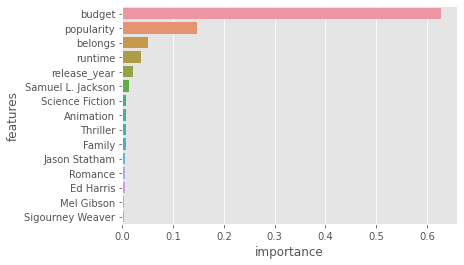

In [157]:
evaluation(GBM_predictions, y_test, GBM)

RMSE is 6276860793889718.0
R_squared is 0.626300163425692


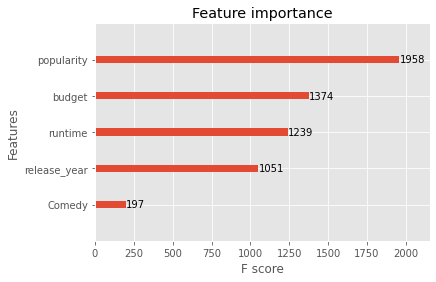

In [77]:
evaluation(XGB_predictions, y_test, model)

In [70]:
cross_val_score(best_gbm.best_estimator_, X=X, y=Y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

array([-5.68799567e+15, -6.58261194e+15, -6.76781702e+15, -5.54279990e+15,
       -5.02513394e+15])